# Information About Given Data

# <center> *****1. IMPORTING LIBRARIES***** </CENTER>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Ignore All Unnecessory Warnings
import warnings
warnings.filterwarnings('ignore')


# Show All columns in Dataframe
pd.set_option('display.max_columns', 999)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/breast-cancer-wisconsin-data_data.csv


# <center> *****2. IMPORTING DATA***** </center>

In [2]:
df = pd.read_csv(r'/kaggle/input/breast-cancer/breast-cancer-wisconsin-data_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# <center> *****3. EXPLORATORY DATA ANALYSIS***** </center>

In [3]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 31)

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [7]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.020710,0.016260,0.02080,0.005304,15.30,33.17,100.20,706.7,0.1241,0.22640,0.1326,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,0.1415,0.9671,0.968,9.704,0.005883,0.006263,0.009398,0.006189,0.02009,0.002377,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,0.4357,1.0730,3.833,54.220,0.005524,0.036980,0.027060,0.012210,0.01415,0.003397,23.36,32.06,166.40,1688.0,0.1322,0.56010,0.3865,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.720,0.008824,0.031080,0.031120,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.52090,0.4646,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,1.4280,1.822,16.970,0.008064,0.017640,0.025950,0.010370,0.01357,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.4023,0.14240,0.2964,0.09606


In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# <center> *****4. STANDARD SCALAR***** </cente>

In [9]:
scalar = StandardScaler()

X_train_trf = scalar.fit_transform(X_train)
X_test_trf = scalar.transform(X_test)

In [10]:
X_train_trf

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

# <center> *****5. KNN CLASSIFIER***** </center>

In [11]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [12]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [13]:
y_predict = knn.predict(X_test_trf)

In [14]:
accuracy_score(y_test, y_predict)

0.9736842105263158

# <center> *****How To Select K***** </center>

#### `Two Ways to Find "k" Value`
1. Heustric:
        In this we simply take np.sqrt(Number OF Observations).
        In this we generally need to avoid even value.
   
3. Experimentation:
        We use Cross-validation. that means by plotting graph of "k-value vs Accuracy Score". Then the "k" value having highest accuracy we prefer that "k" as best k.

In [15]:
np.sqrt(X_train.shape[0])

np.float64(21.330729007701542)

In [16]:
scores = []

for i in range(1, 22):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn.fit(X_train_trf, y_train)

    y_pred = knn.predict(X_test_trf)
    
    scores.append(accuracy_score(y_test, y_pred))

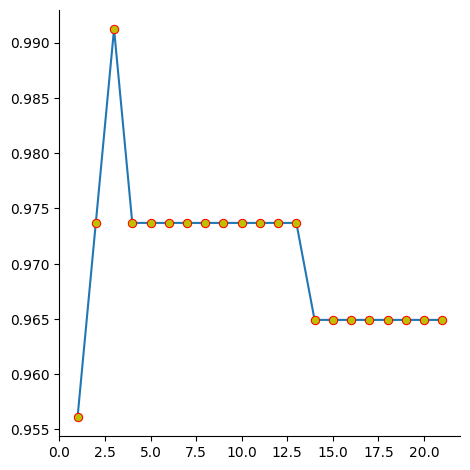

In [17]:
sns.relplot(x = np.arange(1, 22), y = scores, kind = 'line', marker = 'o', mec = 'r', mfc = 'y')

# <center> *****6. FINAL KNN CLASSIFIER USING BEST "K"***** </center> 

In [18]:
knn_best = KNeighborsClassifier(n_neighbors = 3)

knn_best.fit(X_train_trf, y_train)
y_pred_best = knn_best.predict(X_test_trf)

accuracy_score(y_test, y_pred_best)

0.9912280701754386